In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [2]:
df =pd.read_csv('./부산맛집_유튜브.csv',encoding='utf-8')

In [3]:
df['title'].str[0:]

0                           현지인만 가는 부산 찐! 가성비 식당 BEST 10
1                            절대 공개하면 안되는 부산의 미친식당 TOP4 !
2          이 두분 지금 싸우는거 아닙니다.  36년 한우 도매식육식당에서 벌어진 버섯 대첩
3      [부산 맛집] 부산 여행 전 보세요 :) 부산 맛집 BEST 12 | 부산 해운대 ...
4                                   부산 맛집 직이네 | 또간집 EP.9
                             ...                        
641                     부산 2천원 양꼬치 한입 먹방 😋 차이나타운 부산역 앞 🚄
642    [Vlog#35] 더추워지기전, 입맛없을때 한번 방문해보세요! | 부산맛집 | 서면...
643                            #shorts 마구로테이블 숙성참치 釜山マグロ
644     VLOG 부산 브이로그 마지막 바다뷰 맛집,바다뷰 카페 |웨이브온 |해운대칼국수 |기장
645    ಹೆಂಗಸರು ಮಾತ್ರವೆ ಇರುವ ದ್ವೀಪದಲ್ಲಿ ಸಿಕ್ಕಿಬಿದ್ದ ಹು...
Name: title, Length: 646, dtype: object

In [4]:
df['title']= df['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['title']=df["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [5]:
df

,title
0,현지인만 가는 부산 찐 가성비 식당 BEST 10
1,절대 공개하면 안되는 부산의 미친식당 TOP4
2,이 두분 지금 싸우는거 아닙니다 36년 한우 도매식육식당에서 벌어진 버섯 대첩
3,부산 맛집 부산 여행 전 보세요 부산 맛집 BEST 12 부산 해운대 맛집 부산 ...
4,부산 맛집 직이네 또간집 EP 9
...,...
641,부산 2천원 양꼬치 한입 먹방 차이나타운 부산역 앞
642,Vlog 35 더추워지기전 입맛없을때 한번 방문해보세요 부산맛집 서면맛집 돈까스 ...
643,shorts 마구로테이블 숙성참치 釜山マグロ
644,VLOG 부산 브이로그 마지막 바다뷰 맛집 바다뷰 카페 웨이브온 해운대칼국수 기장


In [6]:
df['title'].to_csv('./부산맛집_split.csv',encoding='utf-8',index=False)

In [7]:
df['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,현지인만,가는,부산,찐,가성비,식당,BEST,10,None,None,...,None,None,None,None,None,None,None,None,None,None
1,절대,공개하면,안되는,부산의,미친식당,TOP4,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,이,두분,지금,싸우는거,아닙니다,36년,한우,도매식육식당에서,벌어진,버섯,...,None,None,None,None,None,None,None,None,None,None
3,,부산,맛집,부산,여행,전,보세요,부산,맛집,BEST,...,투어,여행,브이로그,먹방,메뉴,리뷰,None,None,None,None
4,부산,맛집,직이네,또간집,EP,9,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,부산,2천원,양꼬치,한입,먹방,차이나타운,부산역,앞,,None,...,None,None,None,None,None,None,None,None,None,None
642,,Vlog,35,더추워지기전,입맛없을때,한번,방문해보세요,부산맛집,서면맛집,돈까스,...,None,None,None,None,None,None,None,None,None,None
643,,shorts,마구로테이블,숙성참치,釜山マグロ,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
644,VLOG,부산,브이로그,마지막,바다뷰,맛집,바다뷰,카페,웨이브온,해운대칼국수,...,None,None,None,None,None,None,None,None,None,None


In [8]:
# 파일로드
data = pd.read_csv('./부산맛집_split.csv',encoding='utf-8')
data = data['title']

In [9]:
data

0                            현지인만 가는 부산 찐 가성비 식당 BEST 10
1                             절대 공개하면 안되는 부산의 미친식당 TOP4 
2            이 두분 지금 싸우는거 아닙니다 36년 한우 도매식육식당에서 벌어진 버섯 대첩
3       부산 맛집 부산 여행 전 보세요 부산 맛집 BEST 12 부산 해운대 맛집 부산 ...
4                                     부산 맛집 직이네 또간집 EP 9
                             ...                        
641                        부산 2천원 양꼬치 한입 먹방 차이나타운 부산역 앞 
642     Vlog 35 더추워지기전 입맛없을때 한번 방문해보세요 부산맛집 서면맛집 돈까스 ...
643                             shorts 마구로테이블 숙성참치 釜山マグロ
644        VLOG 부산 브이로그 마지막 바다뷰 맛집 바다뷰 카페 웨이브온 해운대칼국수 기장
645    ಹ ಗಸರ ಮ ತ ರವ ಇರ ವ ದ ವ ಪದಲ ಲ ಸ ಕ ಕ ಬ ದ ದ ಹ ಡ ಗ ...
Name: title, Length: 646, dtype: object

In [10]:
# 데이터가져오기
f = open("./부산맛집_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [11]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [12]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [13]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산      1040
맛집       999
부산여행      95
추천        90
해운대       67
        ... 
삼계탕        7
휴가         6
안주         6
가면         6
일본         6
Length: 100, dtype: int64


In [14]:
count_data = korean.to_dict()

In [15]:
from collections import Counter


count = Counter(count_data)

In [16]:
count

Counter({'부산': 1040,
         '맛집': 999,
         '부산여행': 95,
         '추천': 90,
         '해운대': 67,
         '서면': 65,
         '카페': 64,
         '광안': 62,
         '여행': 61,
         '로그': 58,
         '브이': 57,
         '먹방': 43,
         '식당': 38,
         '남포동': 36,
         '투어': 28,
         '돼지국밥': 27,
         '일상': 26,
         '국밥': 24,
         '기장': 23,
         '술집': 23,
         '밀면': 22,
         '코스': 22,
         '탐방': 21,
         '지인': 20,
         '갈비': 19,
         '구이': 18,
         '시장': 17,
         '노포': 17,
         '여기': 17,
         '가성': 17,
         '한우': 17,
         '영도': 16,
         '만두': 16,
         '고기': 15,
         '냉면': 15,
         '곱창': 14,
         '오늘': 14,
         '브런치': 13,
         '횟집': 13,
         '방문': 13,
         '수제': 13,
         '데이트': 12,
         '돈까스': 12,
         '초량': 12,
         '현지': 12,
         '토박이': 11,
         '롯데': 11,
         '짬뽕': 11,
         '한국': 11,
         '피자': 11,
         '인생': 11,
         '사람': 10,

In [17]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

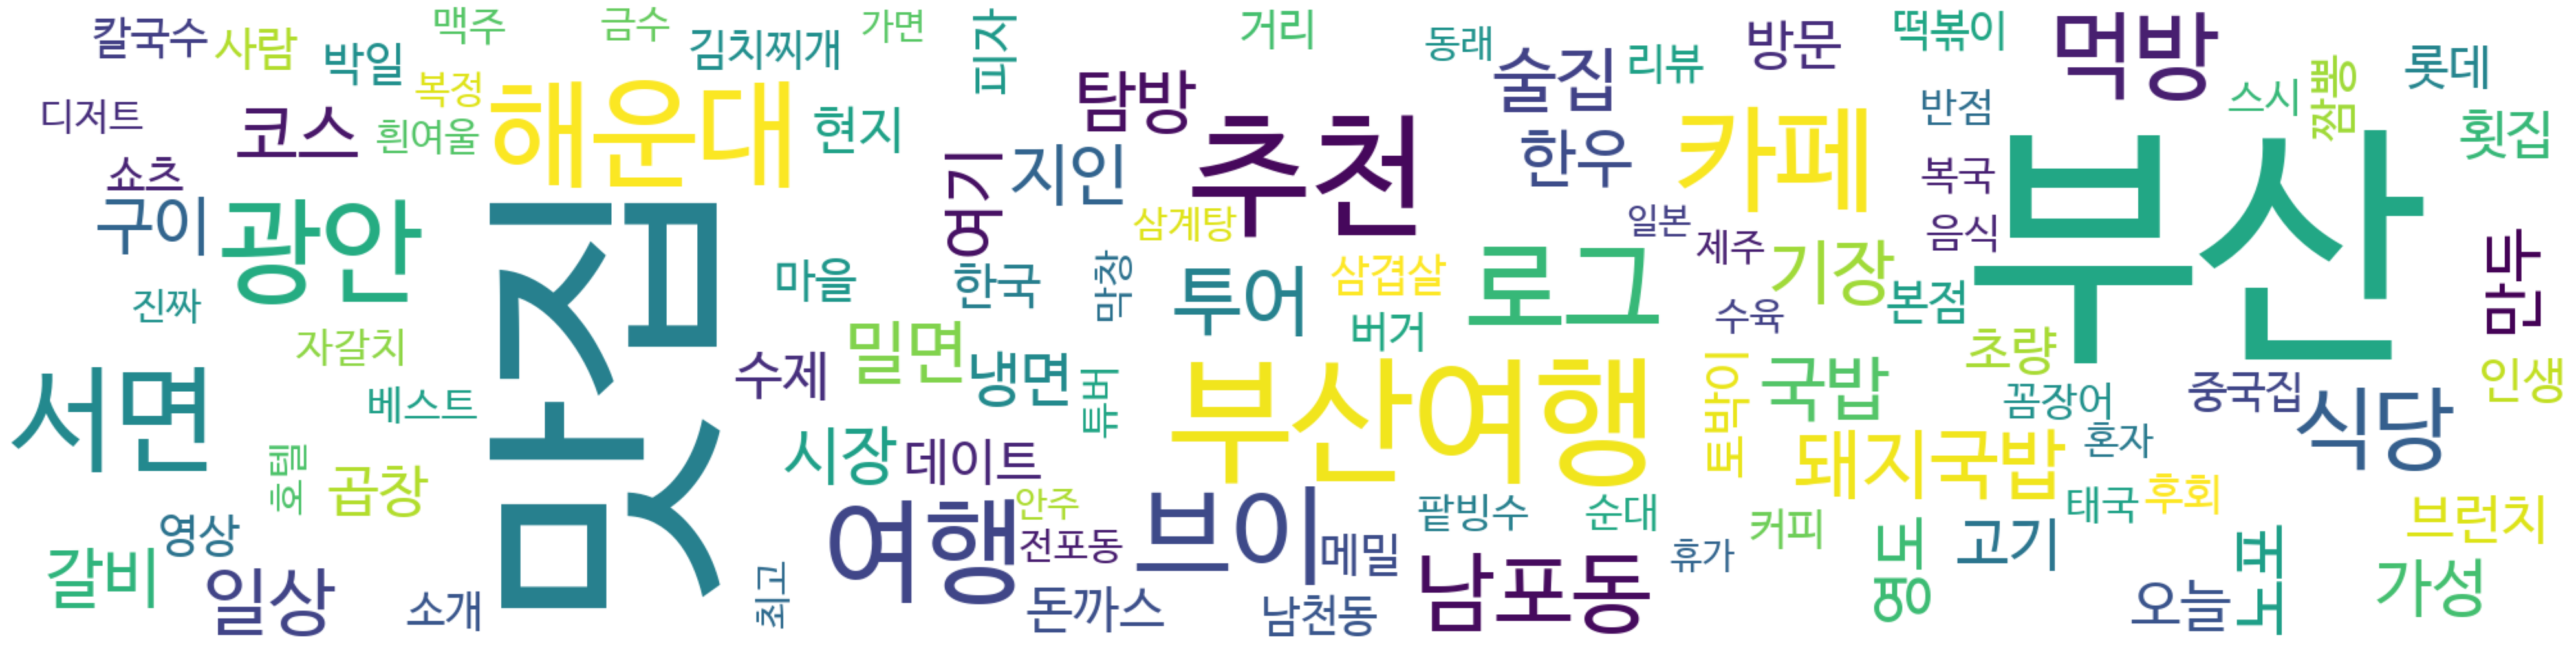

In [18]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()